In [40]:
import numpy as np
import math as m
import random as rand
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import time
from matplotlib.animation import FuncAnimation

class IsingLoopsSimulation:
    def __init__(self, L, pasos_eq=1000, mc_pasos=1000, semilla=None):
        if semilla is not None: #Configuración de semillas
            np.random.seed(semilla)        # Para numpy
            random.seed(semilla + 1)       # Para el módulo random estándar
        self.L = L          # Definimos el lado de la lattice
        self.N = L * L     #Número de espínes
        self.pasos_eq = pasos_eq    #Pasos para el equilibrio termodinámico
        self.mc_pasos = mc_pasos   #Pasos del método Monte Carlo
        self.normal = 1.0 / (self.N * self.mc_pasos)   #Constante de normalización para la estadística
        self.lattice = np.zeros((self.L, self.L), dtype=int)  #Inicializamos la lattice con todos los sitios blancos (Estado Base)

    def seleccionar_sitio(self): #Función que selecciona y retorna un sitio de la lattice aleatoriamente
        x = int(m.ceil(rand.random() * self.L)) - 1 
        y = int(m.ceil(rand.random() * self.L)) - 1
        return x, y

    def vecindad_moore(self, x, y): #Función que verifica en una vecindad Moore de distancia 1 si todos los vecinos son iguales a 0
        vecinos_moore = [
            ((x + 1) % self.L, y),  # Derecha
            ((x - 1) % self.L, y),  # Izquierda
            (x, (y + 1) % self.L),  # Arriba
            (x, (y - 1) % self.L),   # Abajo
            ((x + 1) % self.L, (y + 1) % self.L), #Diagonal Superior Derecha
            ((x + 1) % self.L, (y - 1) % self.L), #Diagonal Inferior Derecha
            ((x - 1) % self.L, (y + 1) % self.L), #Diagonal Superior Izquierda
            ((x - 1) % self.L, (y - 1) % self.L)  #Diagonal Inferior Izquierda
        ]

        for vx, vy in vecinos_moore:
            if self.lattice[vx, vy] == 0:
                continue
            else:
                return False
        return True

    def vecindad_ventana(self, x, y):
        vecinos_ventana = [
            #((x + 1) % self.L, y),  # Derecha
            #((x - 1) % self.L, y),  # Izquierda
            #(x, (y + 1) % self.L),  # Arriba
            #(x, (y - 1) % self.L),   # Abajo
            #((x + 1) % self.L, (y + 1) % self.L), #Diagonal Superior Derecha
            #((x + 1) % self.L, (y - 1) % self.L), #Diagonal Inferior Derecha
            #((x - 1) % self.L, (y + 1) % self.L), #Diagonal Superior Izquierda
            #((x - 1) % self.L, (y - 1) % self.L),  #Diagonal Inferior Izquierda
            ((x + 2) % self.L, y),
            ((x + 2) % self.L, (y + 1) % self.L),
            ((x + 2) % self.L, (y - 1) % self.L),
            ((x - 2) % self.L, y),
            ((x - 2) % self.L, (y + 1) % self.L),
            ((x - 2) % self.L, (y - 1) % self.L),
            (x , (y + 2) % self.L),
            ((x + 1) % self.L , (y + 2) % self.L),
            ((x - 1) % self.L , (y + 2) % self.L),
            (x , (y - 2) % self.L),
            ((x + 1) % self.L , (y - 2) % self.L),
            ((x - 1) % self.L , (y - 2) % self.L),
        ]
        for vx, vy in vecinos_ventana:
            if self.lattice[vx, vy] == 0:
                continue
            else:
                return False
        return True
   
    def vecindad_L(self, x, y):
        coordenadas_negras = []
        vecinos_neumann = [
            ((x + 1) % self.L, y),  # Derecha
            ((x - 1) % self.L, y),  # Izquierda
            (x, (y + 1) % self.L),  # Arriba
            (x, (y - 1) % self.L),   # Abajo
        ]

        for vx, vy in vecinos_neumann:
            if self.lattice[vx, vy] == 1:
                coordenadas_negras.append((vx, vy))
        if coordenadas_negras == [((x + 1) % self.L, y), (x, (y + 1) % self.L)] or coordenadas_negras == [((x + 1) % self.L, y), (x, (y - 1) % self.L)] or coordenadas_negras == [((x - 1) % self.L, y), (x, (y + 1) % self.L)] or coordenadas_negras == [((x - 1) % self.L, y), (x, (y - 1) % self.L)]:
            return True
        else:
            return False
    
    def unimin(self, x, y):
        cn = []
        vecinos_neumann = [
            ((x + 1) % self.L, y),  # Derecha
            ((x - 1) % self.L, y),  # Izquierda
            (x, (y + 1) % self.L),  # Arriba
            (x, (y - 1) % self.L),   # Abajo
        ]
        for vx, vy in vecinos_neumann:
            if self.lattice[vx, vy] == 1:
                cn.append((vx, vy))
                
        if cn == [((x + 1) % self.L, y), (x, (y + 1) % self.L)]:
            if self.lattice[(x + 1) % self.L, (y + 1) % self.L] == 1:
                return True, ((x + 1) % self.L, (y + 1) % self.L)
            else:
                return False, ((x + 1) % self.L, (y + 1) % self.L)
        elif cn == [((x + 1) % self.L, y), (x, (y - 1) % self.L)]:
            if self.lattice[(x + 1) % self.L, (y - 1) % self.L] == 1:
                return True, ((x + 1) % self.L, (y - 1) % self.L)
            else:
                return False, ((x + 1) % self.L, (y - 1) % self.L)
        elif cn == [((x - 1) % self.L, y), (x, (y + 1) % self.L)]:
            if self.lattice[(x - 1) % self.L, (y + 1) % self.L] == 1:
                return True, ((x - 1) % self.L, (y + 1) % self.L)
            else:
                return False, ((x - 1) % self.L, (y + 1) % self.L)
        elif cn == [((x - 1) % self.L, y), (x, (y - 1) % self.L)]:
            if self.lattice[(x - 1) % self.L, (y - 1) % self.L] == 1:
                return True, ((x - 1) % self.L, (y - 1) % self.L)
            else:
                return False, ((x - 1) % self.L, (y - 1) % self.L)
        
        return False, None
                
                
    def cambio_blanco(self, x, y):
        if self.vecindad_ventana(x, y):
            self.lattice[x, y] = 0 
            vecinos_moore = self.calcula_vm(x, y)
            for vx, vy in vecinos_moore:
                self.lattice[vx, vy] = 1            
                
    def calcula_vm(self, x, y):#Funcion que calcula la vecindad Moore de ciertas coordenadas
        vecinos_moore = [
            ((x + 1) % self.L, y),  # Derecha
            ((x - 1) % self.L, y),  # Izquierda
            (x, (y + 1) % self.L),  # Arriba
            (x, (y - 1) % self.L),   # Abajo
            ((x + 1) % self.L, (y + 1) % self.L), #Diagonal Superior Derecha
            ((x + 1) % self.L, (y - 1) % self.L), #Diagonal Inferior Derecha
            ((x - 1) % self.L, (y + 1) % self.L), #Diagonal Superior Izquierda
            ((x - 1) % self.L, (y - 1) % self.L)  #Diagonal Inferior Izquierda
        ]
        return vecinos_moore

    def calcula_vv(self, x, y):
        vecinos_ventana = [
            #((x + 1) % self.L, y),  # Derecha
            #((x - 1) % self.L, y),  # Izquierda
            #(x, (y + 1) % self.L),  # Arriba
            #(x, (y - 1) % self.L),   # Abajo
            #((x + 1) % self.L, (y + 1) % self.L), #Diagonal Superior Derecha
            #((x + 1) % self.L, (y - 1) % self.L), #Diagonal Inferior Derecha
            #((x - 1) % self.L, (y + 1) % self.L), #Diagonal Superior Izquierda
            #((x - 1) % self.L, (y - 1) % self.L),  #Diagonal Inferior Izquierda
            ((x + 2) % self.L, y),
            ((x + 2) % self.L, (y + 1) % self.L),
            ((x + 2) % self.L, (y - 1) % self.L),
            ((x - 2) % self.L, y),
            ((x - 2) % self.L, (y + 1) % self.L),
            ((x - 2) % self.L, (y - 1) % self.L),
            (x , (y + 2) % self.L),
            ((x + 1) % self.L , (y + 2) % self.L),
            ((x - 1) % self.L , (y + 2) % self.L),
            (x , (y - 2) % self.L),
            ((x + 1) % self.L , (y - 2) % self.L),
            ((x - 1) % self.L , (y - 2) % self.L),
        ]
        return vecinos_ventana

    def calcula_vn(self, x, y):
        vecinos_neumann = [
            ((x + 1) % self.L, y),  # Derecha
            ((x - 1) % self.L, y),  # Izquierda
            (x, (y + 1) % self.L),  # Arriba
            (x, (y - 1) % self.L),   # Abajo
        ]
        return vecinos_neumann
        
    """
    def diagonal_opuesta(self, x, y):
        if x, y == (x + 1) % self.L, (y + 1) % self.L:
            return ((x - 1) % self.L, (y - 1) % self.L)
        elif x, y == (x + 1) % self.L, (y - 1) % self.L:
            return ((x - 1) % self.L, (y + 1) % self.L)
        elif x,y == (x - 1) % self.L, (y + 1) % self.L:
            return ((x + 1) % self.L, (y - 1) % self.L)
        else:
            return ((x + 1) % self.L, (y + 1) % self.L)
    """
    def calcula_diagonal(self, vecinos, x, y):#Funcion que calcula la diagonal opuesta dada dos vecinos adyacentes (ortogonales)
        ch, cv = vecinos[0], vecinos[1] #Coordinadas horizontales y verticales vecinas
        if ch == ((x + 1) % self.L, y) and cv == (x, (y + 1) % self.L):
            return ((x + 1) % self.L, (y + 1) % self.L)
        elif ch == ((x - 1) % self.L, y) and cv == (x, (y + 1) % self.L):
            return ((x - 1) % self.L, (y + 1) % self.L)
        elif ch == ((x + 1) % self.L, y) and cv == (x, (y - 1) % self.L):
            return ((x + 1) % self.L, (y - 1) % self.L)
        elif ch == ((x - 1) % self.L, y) and cv == (x, (y - 1) % self.L):
            return ((x - 1) % self.L, (y - 1) % self.L)
        
    def vertical(self, x, y):
        coordenadas_negras = []
        vecinos_neumann = [
            ((x + 1) % self.L, y),  # Derecha
            ((x - 1) % self.L, y),  # Izquierda
            (x, (y + 1) % self.L),  # Arriba
            (x, (y - 1) % self.L),   # Abajo
        ]

        for vx, vy in vecinos_neumann:
            if self.lattice[vx, vy] == 1:
                coordenadas_negras.append((vx, vy))
                
        if coordenadas_negras == [(x, (y + 1) % self.L), (x, (y - 1) % self.L)]: 
            return True
        else:
            return False
    
    def cambio_negro(self, x, y):
        if self.vecindad_L(x, y):
            uni_min, coord_diagonales = self.unimin(x,y) #Revisamos si es una unidad minima negra y retornamos un booleano con las coordenadas del vecino diagonal
            if uni_min: #Si estamos en una unidad minima negra
                vdx, vdy = coord_diagonales
                if np.random.choice([0, 1]) == 1: #Hacemos un volado
                    if self.vecindad_ventana(vdx, vdy): #Si cumplimos con la restricción de vecinos
                        self.lattice[vdx, vdy] = 0 #Ampliamos el cuadro 2x2 a un cuadro 3x3 con centro blanco
                        vecinos_moore = self.calcula_vm(vdx, vdy)
                        for vx, vy in vecinos_moore:
                            self.lattice[vx, vy] = 1
                else: #Si cae 0 entonces se colapsa el cuadro minimo a todos blancos
                    self.lattice[x, y] = 0
                    self.lattice[vdx, vdy] = 0
                    self.lattice[x, vdy] = 0
                    self.lattice[vdx, y] = 0
            elif uni_min == False and coord_diagonales != None:
                vdx, vdy = coord_diagonales
                vecinos_moore = self.calcula_vm(x, y)
                vecinos_sin_unimin = [(vx, vy) for (vx, vy) in vecinos_moore if ((vx, vy) != (x, y) and (vx, vy) != (vdx, vdy) and (vx, vy) != (vdx, y) and (vx, vy) != (x, vdy))]
                if np.random.choice([0, 1]) == 1: #Hacemos un volado
                    #Si sale 1 expandimos el loop diagonalmente, con restricciones de vecinos 
                    if self.cambio_diagonal(vecinos_sin_unimin):
                        vecinos_msu_diagonal = [(vx, vy) for (vx, vy) in self.calcula_vm(vdx, vdy) if ((vx, vy) != (x, y) and (vx, vy) != (vdx, vdy) and (vx, vy) != (vdx, y) and (vx, vy) != (x, vdy))] #Vecinos Moore de la diagonal sin unimin
                        vecinos_ventana = self.calcula_vv(x,y)
                        restriccion_ventana = [(vx, vy) for (vx, vy) in vecinos_ventana if (vx, vy) not in vecinos_msu_diagonal]
                        if self.no_restriccion_diagonal(restriccion_ventana):
                            for vx, vy in vecinos_moore:
                                self.lattice[x, y] = 0
                                if vx == vdx and vy == vdy:
                                    self.lattice[vx, vy] = 0
                                else:
                                    self.lattice[vx, vy] = 1
                else: #Si sale 0 entonces colapsamos hacia el blanco
                    vecinos_neumann_diagonal = self.calcula_vn(vdx, vdy)
                    vecinos_restriccion = [(vx, vy) for vx, vy in vecinos_neumann_diagonal if ((vx, vy) != (vdx, y) and (vx, vy) != (x, vdy))]
                    vecinos_moore_d = self.calcula_vm(vdx, vdy)
                    vddx, vddy = self.calcula_diagonal(vecinos_restriccion, vdx, vdy)
                    vecinos_msu_d = [(vx, vy) for (vx, vy) in vecinos_moore_d if ((vx, vy) != (vddx, vdy) and (vx, vy) != (vdx, vddy) and (vx, vy) != (vdx, vdy) and (vx, vy) != (vddx, vddy))]
                    
                            
                    if self.cambio_contraccion(vecinos_restriccion):
                        for vx, vy in vecinos_moore_d:
                            contador = 0
                            if self.lattice[vx, vy] == 1:
                                contador += 1
        
                        if contador == 8:
                            self.lattice[vdx, vdy] = 1
                            for vx, vy in vecinos_msu_d:
                                self.lattice[vx, vy] = 0
                                
                        elif self.lattice[vddx, vddy] == 0:
                            self.lattice[vdx, vdy] = 1
                            for vx, vy in vecinos_msu_d:
                                self.lattice[vx, vy] = 0                            
        """
        elif self.vertical(x, y):
            if np.random.choice([0, 1]) == 0: #Si cae 0 entonces elegimos el lado izquierdo
                vlx, vly = (x - 1) % self.L, y
                vecinos_moore_lat = self.calcula_vm(vlx, vly)
                vecinos_msv_l = [(vx, vy) for (vx, vy) in  vecinos_moore_lat if ((vx, vy) != (x,y) and (vx, vy) != (x, (y + 1) % self.L) and (vx, vy) != ((x, (y - 1) % self.L)))]
                if self.cambio_lateral(vecinos_msv_l):
                    self.lattice[x, y] = 0
                    self.lattice[vlx, vly] = 1
                    self.lattice[vlx, (vly + 1) % self.L] = 1
                    self.lattice[vlx, (vly - 1) % self.L] = 1
            else:#Si cae 1 elegimos el lado derecho
                vlx, vly = (x + 1) % self.L, y
                vecinos_moore_lat = self.calcula_vm(vlx, vly) 
                vecinos_msv_l = [(vx, vy) for (vx, vy) in  vecinos_moore_lat if ((vx, vy) != (x,y) and (vx, vy) != (x, (y + 1) % self.L) and (vx, vy) != ((x, (y - 1) % self.L)))]
                if self.cambio_lateral(vecinos_msv_l):
                    self.lattice[x, y] = 0
                    self.lattice[vlx, vly] = 1
                    self.lattice[vlx, (vly + 1) % self.L] = 1
                    self.lattice[vlx, (vly - 1) % self.L] = 1
        """
    def cambio_lateral(self, vecindad):
        for vx, vy in vecindad:
            if self.lattice[vx, vy] == 0:
                continue
            else:
                return False
        return True
        
    def cambio_contraccion(self, vecindad):
        for vx, vy in vecindad:
            if self.lattice[vx, vy] == 1:
                continue
            else:
                return False
        return True                        
                        
    def cambio_diagonal(self, vecindad):
        for vx, vy in vecindad:
            if self.lattice[vx, vy] == 0:
                continue
            else:
                return False
        return True

    def no_restriccion_diagonal(self, ventana):
        for vx, vy in ventana:
            if self.lattice[vx, vy] == 0:
                continue
            else:
                return False
        return True
        
    def algoritmo(self):
        x0, y0 = self.seleccionar_sitio()
        if self.lattice[x0, y0] == 0:
            self.cambio_blanco(x0, y0)
        else:
            self.cambio_negro(x0, y0)
        
    def energia_sitio(self, x, y):
        vecinos = [
            ((x + 1) % self.L, y),  # Derecha
            ((x - 1) % self.L, y),  # Izquierda
            (x, (y + 1) % self.L),  # Arriba
            (x, (y - 1) % self.L)   # Abajo
        ]
        suma_vecinos = 0
        for vx, vy in vecinos:
            suma_vecinos += self.lattice[vx][vy]
        return -self.lattice[x][y] * suma_vecinos

    def energia_total(self):
        energia = 0
        for i in range(0, self.L):
            for j in range(0, self.L):
                energia += self.energia_sitio(i, j)
        return energia

    def magnetizacion_total(self):
        mag = 0
        for i in range(0, self.L):
            for j in range(0, self.L):
                mag += self.lattice[i][j]
        return mag
    
    def decision_espin(self, x, y, T):   #Funcion de decision para cambiar el espin 
        delta = -2*self.energia_sitio(x,y) #Cambio de energía que es dos veces el estado inicial
        if delta <= 0: #Aquí tomamos una decisión de manera probabilística
            return True
        elif rand.random() < m.exp(-delta/T):
            return True
        else:
            return False

    def cambiar_espin(self, x, y):
        self.lattice[x][y] *= -1

    def equilibrio_lattice(self, T): #Funcion que pone en equilibrio al sistema despues de cierto numero de pasos    
        for i in range(0, self.pasos_eq):
            for j in range(0, self.N):
                x, y = self.seleccionar_sitio()
                if self.decision_espin(x,y,T):
                    self.cambiar_espin(x,y)
        return self.lattice

    def graficar_lattice(self, T, dpi=100):
        fig = plt.figure(figsize=(5, 5), dpi=dpi)
        cmap = ListedColormap(['white', 'black'])
        plt.imshow(self.lattice, cmap=cmap, interpolation='none', vmin=0, vmax=1)
        plt.title('Configuración de bucles')
        plt.xticks([])
        plt.yticks([])
        plt.close(fig)  # Evita que se muestren las figuras individualmente
        return fig

    def un_paso_equilibrio(self, T):
        #Realiza un solo paso de equilibrio (un barrido completo) Esto es para hacer animaciones
        for j in range(self.N):
            x, y = self.seleccionar_sitio()
            if self.decision_espin(x, y, T):
                self.cambiar_espin(x, y)
        return self.lattice

    def experimentos_mc(self):
        temp = [t for t in np.arange(0.5, 5.1, 0.1)]#Lista de valores de temperatura desde 1.5 a 5 con pasos de 0.1
        magnet = np.array([]) #Inicializamos arrays para estadística
        magnet_abs = np.array([])
        mabstot_avg = np.array([])
        etot_avg = np.array([])
        etotsq_avg = np.array([])
        sustot_avg = np.array([])
        binder = np.array([])
        for T in temp:
            self.equilibrio_lattice(T) #Primero hacemos que la lattice alcance el equilibrio termodinámico
            E = self.energia_total() # Inicializamos variables globales
            M = self.magnetizacion_total()
            M_abs = np.absolute(self.magnetizacion_total())
            e_tot = 0 #Inicializamos variables para estadística 
            e_totsq = 0 #Energía total al cuadrado
            m_tot = 0 #Magnetizacion total
            m_totsq = 0 #Magnetizacion total al cuadrado
            m_qtot = 0 #Magnetización total a la cuarta
            m_abstot = 0 #Magnetizacion absoluta total
            for i in range(0, self.mc_pasos):     #Loop Monte Carlo 
                for j in range(0, self.N):
                    x, y = self.seleccionar_sitio()
                    if self.decision_espin(x,y,T):
                        self.cambiar_espin(x,y)
                        delta = -2*self.energia_sitio(x,y)
                        E += 2*delta #Si se cambia el espín entonces modificamos las variables globales
                        M += 2*self.lattice[x][y]
                e_tot += float(E/2) #Para cada paso Monte Carlo sumamos a las variables totales el valor global
                e_totsq += float(E/2 * E/2)
                m_tot += float(M)
                m_totsq += float(M * M)
                m_qtot += float(M * M * M * M)
                m_abstot += float(np.sqrt(M * M))
                #magnet = np.append(magnet, M) 
                #magnet_abs = np.append(magnet_abs, np.sqrt(M*M))
            e_avg = e_tot*self.normal
            esq_avg = e_totsq*self.normal/self.N
            m_avg = m_tot*self.normal
            mabs_avg = m_abstot*self.normal
            msq_avg = m_totsq*self.normal
            mq_avg = m_qtot*self.normal
            binder_p = 1 - mq_avg/(3*(msq_avg**2/self.normal))
            sus_avg = (msq_avg - (mabs_avg*mabs_avg*self.N))/T
            etot_avg = np.append(etot_avg, e_avg)
            etotsq_avg = np.append(etotsq_avg, esq_avg)
            mabstot_avg = np.append(mabstot_avg, mabs_avg)
            sustot_avg = np.append(sustot_avg, sus_avg)
            binder = np.append(binder, binder_p)
        return temp, etot_avg, etotsq_avg, mabstot_avg, sustot_avg, binder

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[0 1 1 ... 0 0 1]
 [1 1 0 ... 0 0 1]
 [0 0 0 ... 1 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 0 1 ... 0 0 1]]


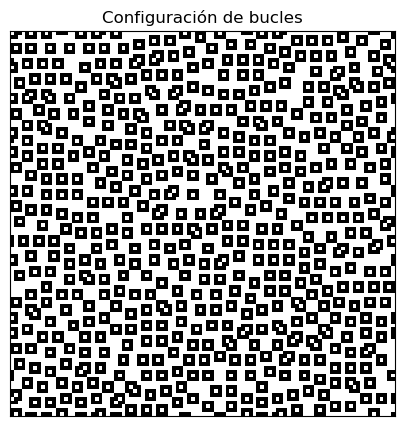

In [47]:
sim = IsingLoopsSimulation(100)
print(sim.lattice)
print("\n")
for i in range(0,1000000):
    sim.algoritmo()
print(sim.lattice)
sim.graficar_lattice(0)